In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir 'data'

In [ ]:
!tar -xzvf '/content/drive/MyDrive/for_atom/aclImdb_v1.tar.gz' -C '/content/data'


Выходные данные были обрезаны до нескольких последних строк (5000).
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclI

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM, Input, Dropout,  Conv1D, MaxPooling1D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import utils
from tensorflow.keras.regularizers import l1, l2
from sklearn.utils import shuffle
# from tokenizers import Tokenizer
# from tokenizers.models import BPE
# from tokenizers.pre_tokenizers import Whitespace
# from tokenizers.trainers import BpeTrainer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
del train_df
del test_df
del data_train
del data_test

In [ ]:
import os
import pandas as pd
data_train = {'review': [], 'rating': []}
data_test = {'review': [], 'rating': []}
def load_data(directory, data):
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            rating = filename.split('_')[1].replace('.txt', '')
            path = os.path.join(directory, filename)
            with open(path, 'r', encoding='utf-8') as file:
                review = file.read()
            data['review'].append(review)
            data['rating'].append(rating)
    return pd.DataFrame(data)




In [ ]:
train_df = load_data('/content/data/aclImdb/train/pos', data_train)
train_df = load_data('/content/data/aclImdb/train/neg', data_train)
train_df = shuffle(train_df)

In [ ]:
test_df = load_data('/content/data/aclImdb/test/neg', data_test)
test_df = load_data('/content/data/aclImdb/test/pos', data_test)
test_df = shuffle(test_df)

In [ ]:
train_df.head()

,review,rating
18916,This movie was so predictable. Its a complete ...,1
4045,Have you ever wished that you could escape you...,10
23560,One of the worst movies I've ever seen with Ro...,2
12021,This movie was a classic. I would have to say ...,10
19963,A hint I think may be gathered by the various ...,4


In [ ]:
train_df.shape

(25000, 2)

In [ ]:
train_df.groupby('rating').count()

,review
rating,
1,5100
10,4732
2,2284
3,2420
4,2696
7,2496
8,3009
9,2263


In [ ]:
test_df.groupby('rating').count()

,review
rating,
1,5022
10,4999
2,2302
3,2541
4,2635
7,2307
8,2850
9,2344


In [ ]:
a = train_df['rating'].unique().astype(int)
a.sort()
print(a)

[ 1  2  3  4  7  8  9 10]


In [ ]:
b = test_df['rating'].unique().astype(int)
b.sort()
print(b)

[ 1  2  3  4  7  8  9 10]


In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def remove_stopwords(text):
  words = nltk.word_tokenize(text)
  filtered_words = [word for word in words if word.lower() not in stop_words]
  return " ".join(filtered_words)

In [ ]:
train_df['filtered'] = train_df['review'].apply(remove_stopwords)
test_df['filtered'] = test_df['review'].apply(remove_stopwords)
train_df[['review', 'filtered']]

,review,filtered
18916,This movie was so predictable. Its a complete ...,"movie predictable . complete rip , `` abused d..."
4045,Have you ever wished that you could escape you...,ever wished could escape dull stressful life s...
23560,One of the worst movies I've ever seen with Ro...,One worst movies 've ever seen Robert De Niro ...
12021,This movie was a classic. I would have to say ...,movie classic . would say movie caught best wo...
19963,A hint I think may be gathered by the various ...,hint think may gathered various comments threa...
...,...,...
14450,I was really looking forward to this show give...,really looking forward show given quality acto...
9667,As with a bunch of guys at school we must give...,bunch guys school must give thumbs . Even Grim...
12990,The acting in the film is really well done hon...,"acting film really well done honestly , movie ..."
14183,First some background; I am English and have l...,First background ; English lived London life ....


In [ ]:
import re
def remove_html(text):
  clean = re.compile('<.*?>|&.*?;')
  return re.sub(clean, '', text)

In [ ]:
train_df['filtered'] = train_df['filtered'].apply(remove_html)
test_df['filtered'] = test_df['review'].apply(remove_html)
train_df[['review', 'filtered']]

,review,filtered
18916,This movie was so predictable. Its a complete ...,"movie predictable . complete rip , `` abused d..."
4045,Have you ever wished that you could escape you...,ever wished could escape dull stressful life s...
23560,One of the worst movies I've ever seen with Ro...,One worst movies 've ever seen Robert De Niro ...
12021,This movie was a classic. I would have to say ...,movie classic . would say movie caught best wo...
19963,A hint I think may be gathered by the various ...,hint think may gathered various comments threa...
...,...,...
14450,I was really looking forward to this show give...,really looking forward show given quality acto...
9667,As with a bunch of guys at school we must give...,bunch guys school must give thumbs . Even Grim...
12990,The acting in the film is really well done hon...,"acting film really well done honestly , movie ..."
14183,First some background; I am English and have l...,First background ; English lived London life ....


In [ ]:
train_df['filtered'] = train_df['filtered'].str.lower()
test_df['filtered'] = test_df['filtered'].str.lower()
train_df[['review', 'filtered']]

,review,filtered
18916,This movie was so predictable. Its a complete ...,"movie predictable . complete rip , `` abused d..."
4045,Have you ever wished that you could escape you...,ever wished could escape dull stressful life s...
23560,One of the worst movies I've ever seen with Ro...,one worst movies 've ever seen robert de niro ...
12021,This movie was a classic. I would have to say ...,movie classic . would say movie caught best wo...
19963,A hint I think may be gathered by the various ...,hint think may gathered various comments threa...
...,...,...
14450,I was really looking forward to this show give...,really looking forward show given quality acto...
9667,As with a bunch of guys at school we must give...,bunch guys school must give thumbs . even grim...
12990,The acting in the film is really well done hon...,"acting film really well done honestly , movie ..."
14183,First some background; I am English and have l...,first background ; english lived london life ....


In [ ]:
test_df['rating'] = test_df['rating'].astype(int)
train_df['rating'] = train_df['rating'].astype(int)
mapping = {1:0, 2:1, 3:2, 4:3, 7:4, 8:5, 9:6, 10:7}
train_df['rating'] = train_df['rating'].map(mapping)
test_df['rating'] = test_df['rating'].map(mapping)

# Проверка уникальных значений после преобразования
print(test_df['rating'].unique())

[6 2 7 4 3 5 0 1]


In [ ]:
train_df.groupby('rating').count() / train_df.shape[0] * 100

,review
rating,
0,20.400
1,9.136
2,9.680
3,10.784
4,9.984
5,12.036
6,9.052
7,18.928


In [ ]:
max_words = 20000
max_review_len = 200

**Дефолтный токенизатор**

In [156]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df['filtered'])
sequences_train = tokenizer.texts_to_sequences(train_df['filtered'])
sequences_test = tokenizer.texts_to_sequences(test_df['review'])

In [157]:
X_train = pad_sequences(sequences_train, maxlen=max_review_len)
X_test = pad_sequences(sequences_test, maxlen=max_review_len)
y_test = utils.to_categorical(test_df['rating'], 8)
y_train = utils.to_categorical(train_df['rating'], 8)

In [160]:
model = Sequential([
    Input(shape=(max_review_len,)),
    Embedding(input_dim=max_words, output_dim=100),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(pool_size=4),
    LSTM(64, return_sequences=True, kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    LSTM(64, kernel_regularizer=l2(0.001)),
    Dense(8, activation='softmax')
])

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [161]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.1)

Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.2568 - loss: 2.0265 - val_accuracy: 0.4024 - val_loss: 1.5935
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4716 - loss: 1.3834 - val_accuracy: 0.4096 - val_loss: 1.5548
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5584 - loss: 1.1405 - val_accuracy: 0.4032 - val_loss: 1.6741
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6280 - loss: 0.9777 - val_accuracy: 0.3792 - val_loss: 1.8946
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7052 - loss: 0.8110 - val_accuracy: 0.3620 - val_loss: 2.0348


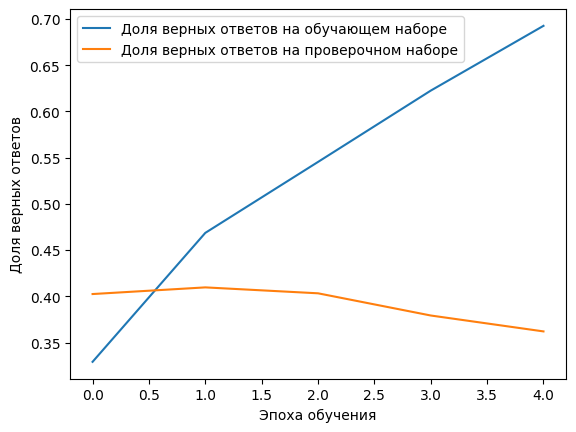

In [163]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [164]:
predictions = model.predict(X_test, verbose=1)
predicted_ratings = predictions.argmax(axis=1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


In [165]:
model.evaluate(X_test, y_test, verbose=1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2504 - loss: 3.2759


[3.247046947479248, 0.25380000472068787]

In [149]:
test_df['predicted_ratings'] = np.array(predicted_ratings)

In [150]:
test_df[['rating', 'predicted_ratings']]

,rating,predicted_ratings
20232,6,6
8479,2,5
14321,7,0
3766,2,4
24802,4,7
...,...,...
14288,7,5
3260,0,5
7455,2,4
22772,7,7


In [166]:
accuracy_per_class = test_df[test_df['rating'] == test_df['predicted_ratings']].groupby('rating').size()

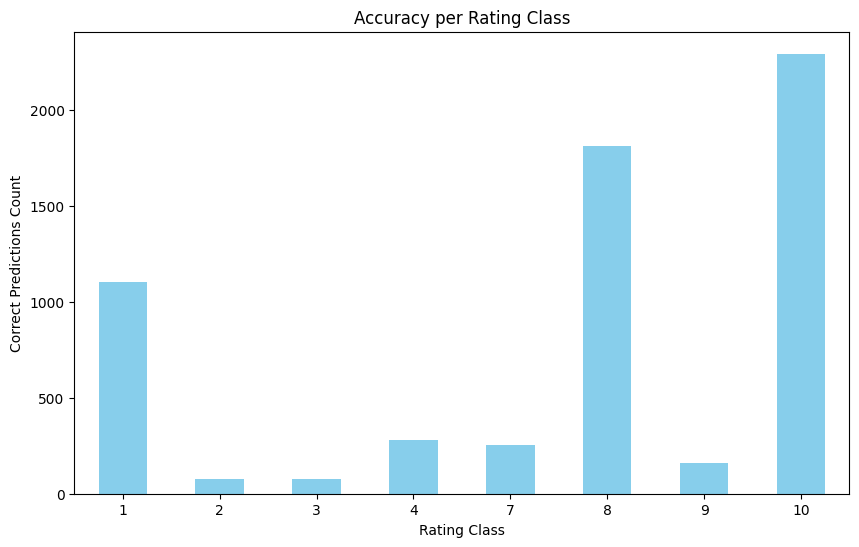

In [168]:
plt.figure(figsize=(10, 6))
accuracy_per_class.plot(kind='bar', color='skyblue')
plt.title('Accuracy per Rating Class')
plt.xlabel('Rating Class')
plt.ylabel('Correct Predictions Count')
plt.xticks(range(8), ['1', '2', '3', '4', '7', '8', '9', '10'], rotation=0)
plt.show()
mapping = {1:0, 2:1, 3:2, 4:3, 7:4, 8:5, 9:6, 10:7}

In [170]:
model.save('my_model.keras')